In [167]:
import pandas as pd
import numpy as np
loan_data = pd.read_csv('../loan_data_2015.csv', low_memory=False)

In [168]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           421094 non-null  int64  
 1   member_id                    421094 non-null  int64  
 2   loan_amnt                    421094 non-null  int64  
 3   funded_amnt                  421094 non-null  int64  
 4   funded_amnt_inv              421094 non-null  float64
 5   term                         421094 non-null  object 
 6   int_rate                     421094 non-null  float64
 7   installment                  421094 non-null  float64
 8   grade                        421094 non-null  object 
 9   sub_grade                    421094 non-null  object 
 10  emp_title                    397220 non-null  object 
 11  emp_length                   397277 non-null  object 
 12  home_ownership               421094 non-null  object 
 13 

In [169]:
loan_data.sample()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
403261,38922421,41706141,23000,23000,22900.0,36 months,6.03,700.02,A,A1,...,NaN,NaN,NaN,NaN,NaN,NaN,43100.0,NaN,NaN,NaN


In [170]:
loan_data.emp_length.unique()

array(['10+ years', '< 1 year', '5 years', '3 years', '4 years', nan,
       '2 years', '8 years', '9 years', '1 year', '6 years', '7 years'],
      dtype=object)

In [171]:
loan_data['emp_length_int'] = loan_data['emp_length'].replace(' year','',regex=True)
loan_data['emp_length_int'] = loan_data['emp_length_int'].replace('s','',regex=True)
loan_data['emp_length_int'] = loan_data['emp_length_int'].replace('<1 ','0',regex=True)
loan_data['emp_length_int'] = loan_data['emp_length_int'].replace('\\+ years','',regex=True)
loan_data['emp_length_int'] = loan_data['emp_length_int'].fillna('0')


In [172]:
loan_data['emp_length_int'] = (
    loan_data['emp_length']
    .replace({'10\\+': '10', '< ?1': '0', 'n/a': np.nan}, regex=True)
    .replace(' years?', '', regex=True)
    .str.strip()
    .astype(float)
)


In [173]:
type(loan_data['emp_length_int'][0])

numpy.float64

In [174]:
loan_data.emp_length_int=pd.to_numeric(loan_data.emp_length_int)

In [175]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y')

In [176]:
loan_data['earliest_cr_line_date']

0        1990-02-01
1        2001-07-01
2        2011-07-01
3        1998-12-01
4        2000-08-01
            ...    
421089   2004-09-01
421090   1974-03-01
421091   2003-09-01
421092   2003-10-01
421093   2001-12-01
Name: earliest_cr_line_date, Length: 421094, dtype: datetime64[ns]

In [177]:

loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - pd.to_datetime(loan_data['earliest_cr_line_date'])) / np.timedelta64(30, 'D')))

In [178]:
loan_data['mths_since_earliest_cr_line'].describe()


count    421094.000000
mean        230.673481
std          99.557666
min        -621.000000
25%         169.000000
50%         215.000000
75%         281.000000
max         596.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [179]:
loan_data.loc[
    loan_data['mths_since_earliest_cr_line'] < 0,
    ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']
].sample(10)


,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
356313,Dec-65,2065-12-01,-584.0
266350,Jul-65,2065-07-01,-579.0
132116,Dec-65,2065-12-01,-584.0
255666,Dec-68,2068-12-01,-621.0
161102,Sep-66,2066-09-01,-594.0
192318,Aug-65,2065-08-01,-580.0
342848,Jan-63,2063-01-01,-549.0
250932,Jan-61,2061-01-01,-525.0
284647,Oct-67,2067-10-01,-607.0
127952,Mar-68,2068-03-01,-612.0


In [180]:
loan_data.loc[
    loan_data['mths_since_earliest_cr_line'] < 0, 
    'mths_since_earliest_cr_line'
] = loan_data['mths_since_earliest_cr_line'].max()


In [181]:
loan_data.mths_since_earliest_cr_line.describe()

count    421094.000000
mean        233.836542
std          92.158858
min          62.000000
25%         170.000000
50%         215.000000
75%         282.000000
max         596.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [182]:
min(loan_data['mths_since_earliest_cr_line'])

62.0

In [183]:
loan_data.term.unique()

array([' 60 months', ' 36 months'], dtype=object)

In [184]:
# Remove 'months', strip spaces, convert to int
loan_data['term_int'] = (
    loan_data['term']
    .astype(str)               # ensure strings
    .str.replace('months','')  # remove 'months'
    .str.strip()               # remove any extra spaces
)


In [185]:
loan_data.term_int = loan_data.term_int.astype(str)
type(loan_data.term_int[0])

str

In [186]:
loan_data['issue_d']

0         Dec-15
1         Dec-15
2         Dec-15
3         Dec-15
4         Dec-15
           ...  
421089    Jan-15
421090    Jan-15
421091    Jan-15
421092    Jan-15
421093    Jan-15
Name: issue_d, Length: 421094, dtype: object

In [187]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - pd.to_datetime(loan_data['issue_d_date'])) / np.timedelta64(30, 'D')))

In [188]:

loan_data['mths_since_issue_d'].describe()

count    421094.000000
mean         29.264105
std           3.727835
min          24.000000
25%          26.000000
50%          29.000000
75%          32.000000
max          36.000000
Name: mths_since_issue_d, dtype: float64

In [189]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 80 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           421094 non-null  int64         
 1   member_id                    421094 non-null  int64         
 2   loan_amnt                    421094 non-null  int64         
 3   funded_amnt                  421094 non-null  int64         
 4   funded_amnt_inv              421094 non-null  float64       
 5   term                         421094 non-null  object        
 6   int_rate                     421094 non-null  float64       
 7   installment                  421094 non-null  float64       
 8   grade                        421094 non-null  object        
 9   sub_grade                    421094 non-null  object        
 10  emp_title                    397220 non-null  object        
 11  emp_length                

In [190]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [191]:
loan_data_dummies=pd.concat(loan_data_dummies, axis=1)

In [192]:
loan_data_dummies

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421089,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
421090,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
421091,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
421092,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [193]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [194]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [195]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [196]:
loan_data.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                        ..
addr_state:WI            0
addr_state:WV            0
addr_state:WY            0
initial_list_status:f    0
initial_list_status:w    0
Length: 202, dtype: int64

In [197]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)

/tmp/ipykernel_17064/4218518735.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)


In [198]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

/tmp/ipykernel_17064/3516588017.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)
/tmp/ipykernel_17064/3516588017.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [199]:
loan_data.loan_status.unique()

array(['Issued', 'Current', 'Fully Paid', 'In Grace Period',
       'Late (16-30 days)', 'Late (31-120 days)', 'Charged Off',
       'Default'], dtype=object)

In [200]:
loan_data['good_bad']=np.where(loan_data['loan_status'].isin
                               (['Charged Off','Default','Late (31-120 days)','Late (16-30 days)']),0,1)

In [201]:
loan_data[['good_bad', 'loan_status']]

,good_bad,loan_status
0,1,Issued
1,1,Issued
2,1,Issued
3,1,Issued
4,1,Issued
...,...,...
421089,1,Current
421090,1,Current
421091,1,Current
421092,1,Current


In [202]:
from sklearn.model_selection import train_test_split

In [203]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'],test_size = 0.2, random_state = 42)

df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train

In [204]:
df_targets_prepr

308635    1
92420     1
336354    1
137359    1
231186    1
         ..
259178    0
365838    1
131932    1
146867    1
121958    1
Name: good_bad, Length: 336875, dtype: int64

In [205]:
import pandas as pd
import numpy as np

def woe_discrete(df, discrete_variable_name, target_variable):
    if isinstance(target_variable, str):
        # target is a column name in df
        df_subset = df[[discrete_variable_name, target_variable]].copy()
        target_col_name = target_variable
    else:
        # target is a Series
        df_subset = df[[discrete_variable_name]].copy()
        df_subset['target'] = target_variable
        target_col_name = 'target'
    
    count_df = df_subset.groupby(discrete_variable_name, as_index=False)[target_col_name] \
                        .count() \
                        .rename(columns={target_col_name: 'n_obs'})
    
    mean_df = df_subset.groupby(discrete_variable_name, as_index=False)[target_col_name] \
                       .mean() \
                       .rename(columns={target_col_name: 'prop_good'})
    
    df_woe_iv = pd.merge(count_df, mean_df, on=discrete_variable_name)
    
    df_woe_iv['prop_n_obs'] = df_woe_iv['n_obs'] / df_woe_iv['n_obs'].sum()
    df_woe_iv['n_good'] = df_woe_iv['prop_good'] * df_woe_iv['n_obs']
    df_woe_iv['n_bad'] = (1 - df_woe_iv['prop_good']) * df_woe_iv['n_obs']
    df_woe_iv['prop_n_good'] = df_woe_iv['n_good'] / df_woe_iv['n_good'].sum()
    df_woe_iv['prop_n_bad'] = df_woe_iv['n_bad'] / df_woe_iv['n_bad'].sum()
    df_woe_iv['WoE'] = np.log(df_woe_iv['prop_n_good'] / df_woe_iv['prop_n_bad'])
    
    df_woe_iv = df_woe_iv.sort_values(by='WoE').reset_index(drop=True)
    df_woe_iv['diff_prop_good'] = df_woe_iv['prop_good'].diff().abs()
    df_woe_iv['diff_WoE'] = df_woe_iv['WoE'].diff().abs()
    df_woe_iv['IV'] = (df_woe_iv['prop_n_good'] - df_woe_iv['prop_n_bad']) * df_woe_iv['WoE']
    df_woe_iv['IV_total'] = df_woe_iv['IV'].sum()
    
    return df_woe_iv


In [206]:
import matplotlib.pyplot as plt
import seaborn as sns
# Imports the libraries we need.
sns.set_theme()
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)

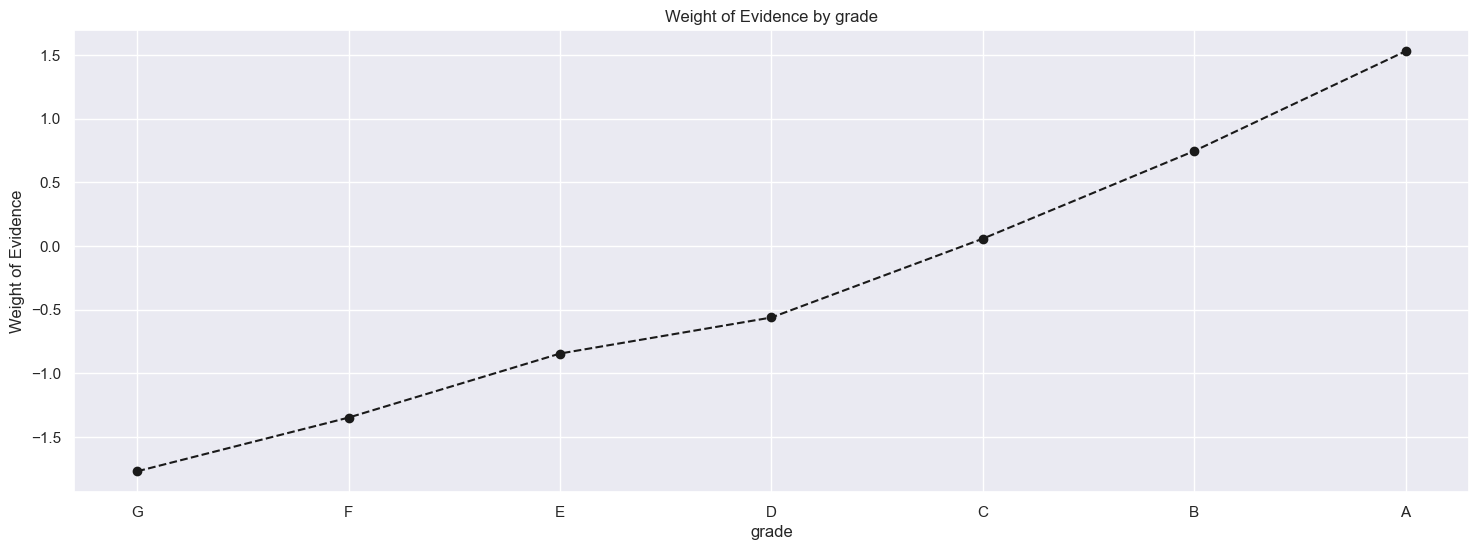

In [207]:
dftemp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
plot_by_woe(dftemp, rotation_of_x_axis_labels = 0)

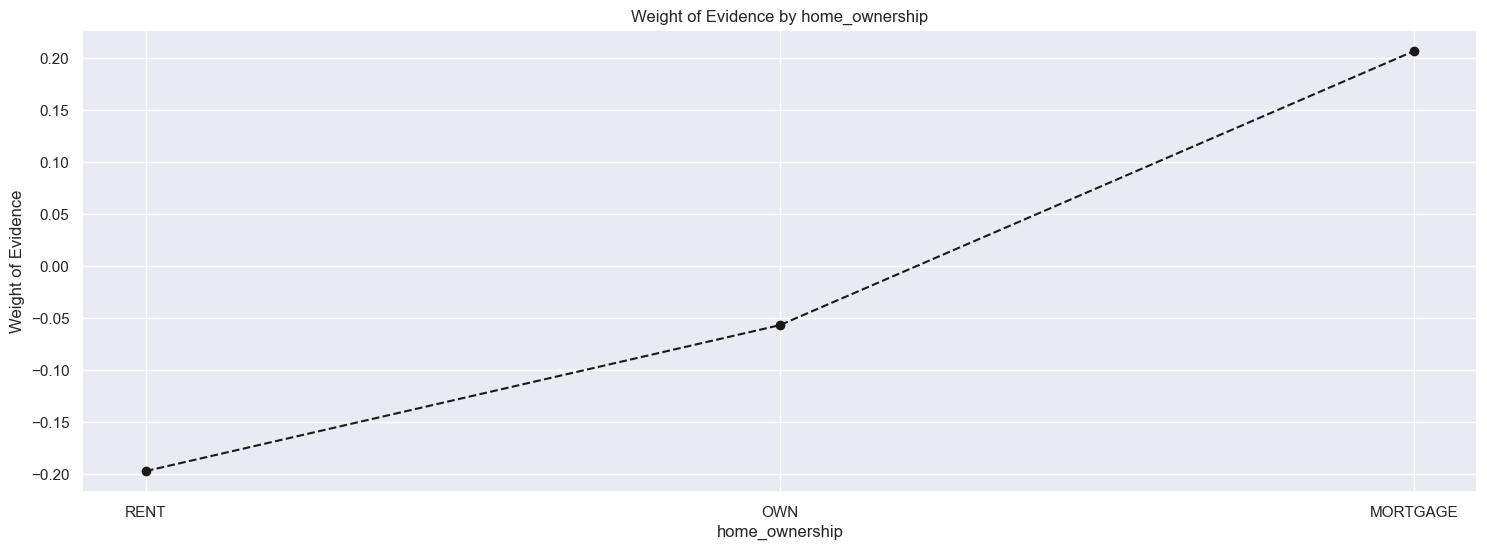

In [208]:
dftemp = woe_discrete(df_inputs_prepr,'home_ownership',df_targets_prepr)
plot_by_woe(dftemp)

In [209]:
dftemp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV,IV_total
0,RENT,134139,0.974094,0.398186,130664.0,3475.0,0.396344,0.482505,-0.196708,NaN,NaN,0.016948,inf
1,OWN,36647,0.977406,0.108785,35819.0,828.0,0.108650,0.114968,-0.056522,0.003312,0.140186,0.000357,inf
2,MORTGAGE,166087,0.982545,0.493023,163188.0,2899.0,0.495000,0.402527,0.206795,0.005139,0.263316,0.019123,inf
3,ANY,2,1.000000,0.000006,2.0,0.0,0.000006,0.000000,inf,0.017455,inf,inf,inf


In [210]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],df_inputs_prepr['home_ownership:ANY']])


In [211]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV,IV_total
0,SD,671,0.965723,0.001992,648.0,23.0,0.001966,0.003194,-0.485346,NaN,NaN,0.000596,inf
1,NV,4753,0.969072,0.014109,4606.0,147.0,0.013971,0.020411,-0.379060,0.003349,0.106286,0.002441,inf
2,HI,1667,0.970606,0.004948,1618.0,49.0,0.004908,0.006804,-0.326617,0.001534,0.052443,0.000619,inf
3,AK,772,0.971503,0.002292,750.0,22.0,0.002275,0.003055,-0.294712,0.000897,0.031905,0.000230,inf
4,OK,3164,0.971555,0.009392,3074.0,90.0,0.009324,0.012497,-0.292817,0.000052,0.001895,0.000929,inf
5,NM,1871,0.972207,0.005554,1819.0,52.0,0.005518,0.007220,-0.268944,0.000652,0.023873,0.000458,inf
6,AL,4263,0.973493,0.012655,4150.0,113.0,0.012588,0.015690,-0.220267,0.001285,0.048677,0.000683,inf
7,LA,4071,0.974453,0.012085,3967.0,104.0,0.012033,0.014440,-0.182368,0.000961,0.037899,0.000439,inf
8,VA,9592,0.974458,0.028473,9347.0,245.0,0.028352,0.034018,-0.182190,0.000004,0.000178,0.001032,inf
9,NY,27148,0.974657,0.080588,26460.0,688.0,0.080261,0.095529,-0.174142,0.000200,0.008048,0.002659,inf


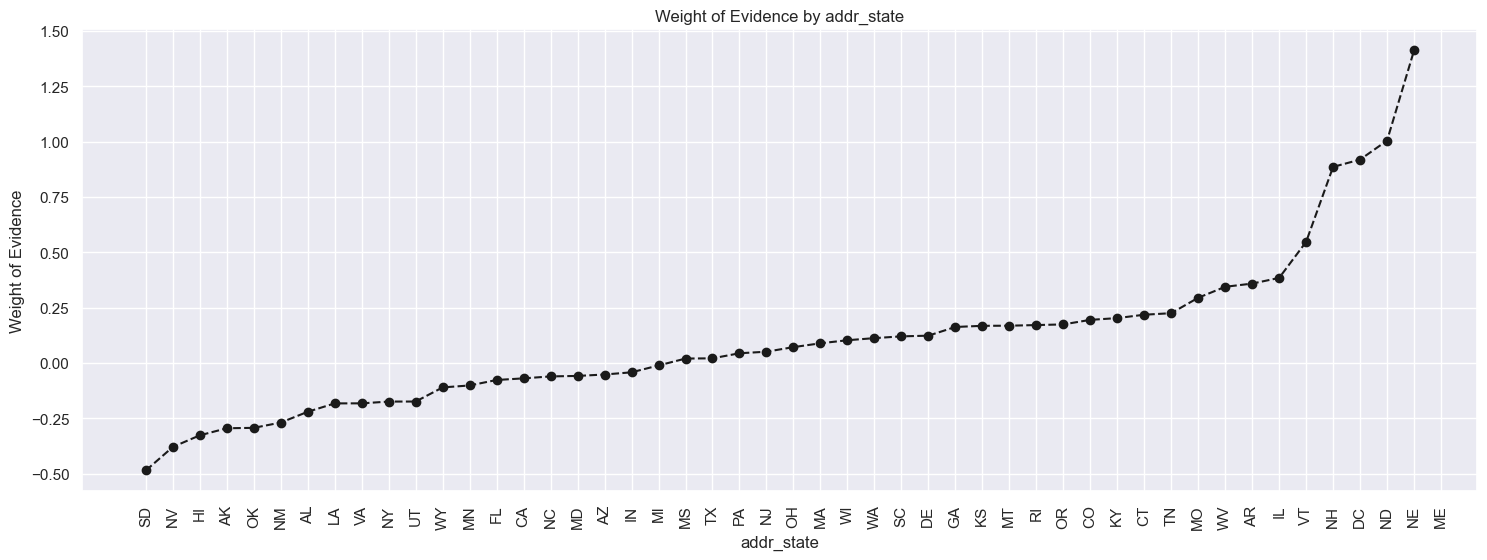

In [212]:
plot_by_woe(df_temp, rotation_of_x_axis_labels = 90)

In [213]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

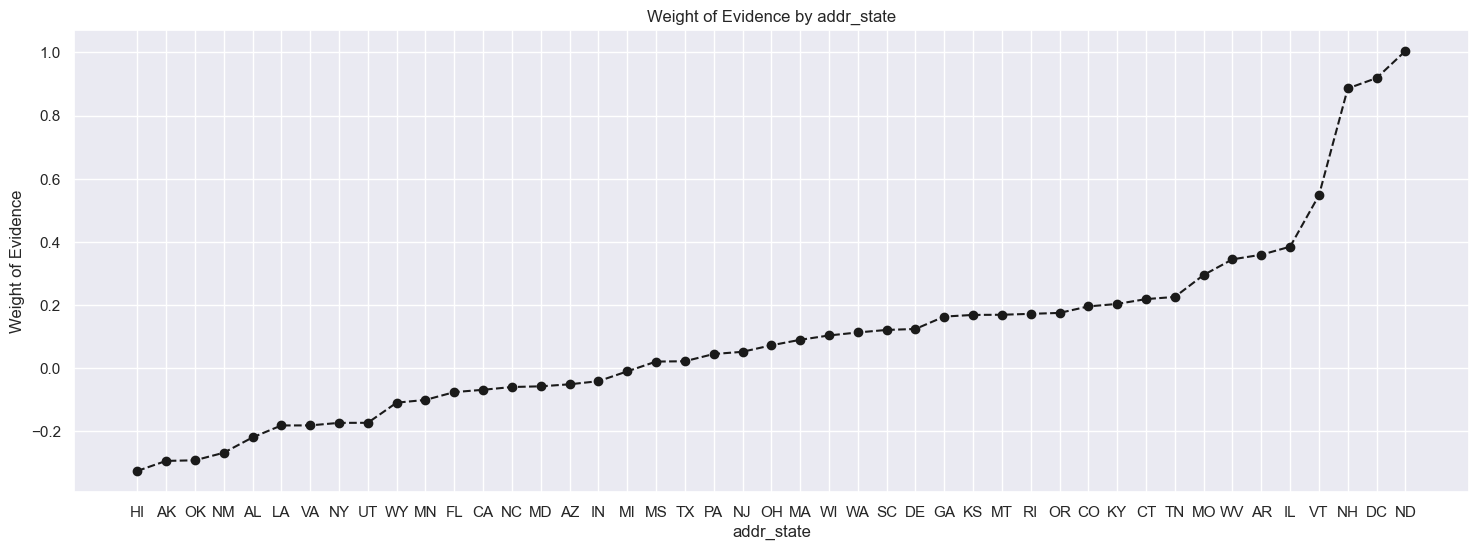

In [214]:
plot_by_woe(df_temp.iloc[2: -2, : ])

In [215]:
df_inputs_prepr['addr_state:IA']=0
df_inputs_prepr['addr_state:ID']=0

In [216]:

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [217]:

dftemp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
dftemp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV,IV_total
0,Verified,98522,0.973194,0.292459,95881.0,2641.0,0.290837,0.366704,-0.231792,NaN,NaN,0.017585,0.047061
1,Source Verified,143592,0.978237,0.426247,140467.0,3125.0,0.426080,0.433907,-0.018204,0.005043,0.213588,0.000142,0.047061
2,Not Verified,94761,0.984846,0.281294,93325.0,1436.0,0.283084,0.199389,0.350484,0.006609,0.368688,0.029334,0.047061


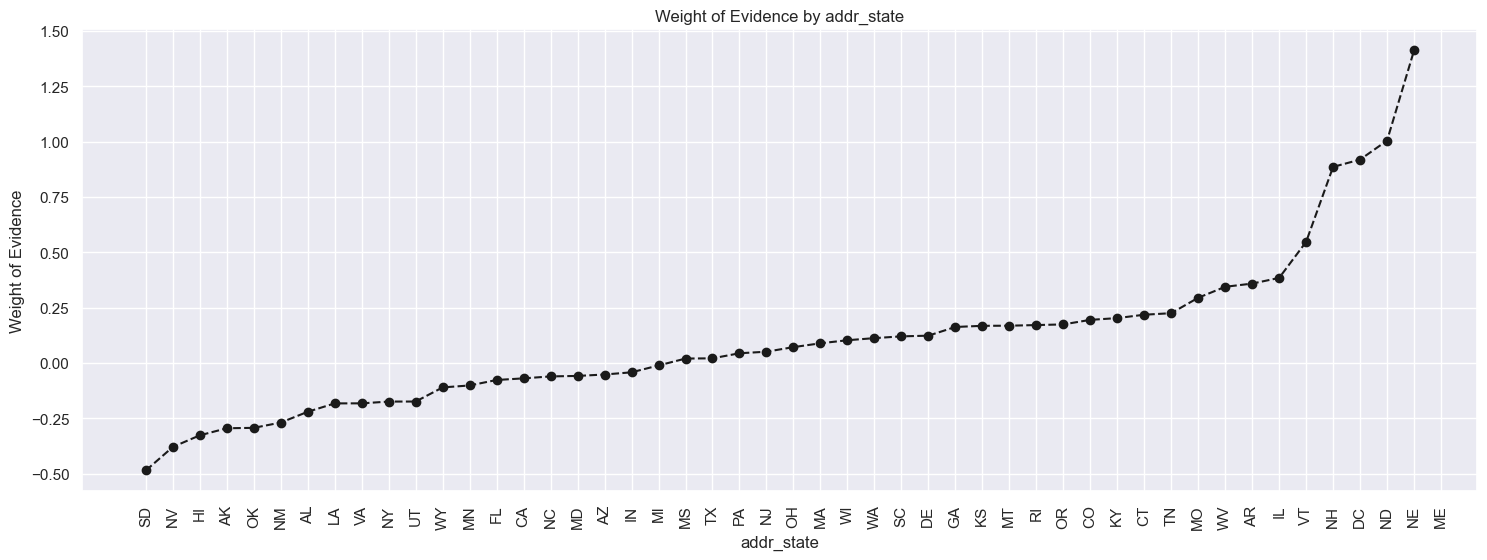

In [218]:
plot_by_woe(df_temp, rotation_of_x_axis_labels = 90)

In [219]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV,IV_total
0,renewable_energy,180,0.950000,0.000534,171.0,9.0,0.000519,0.001250,-0.879304,NaN,NaN,0.000643,inf
1,small_business,2723,0.952259,0.008083,2593.0,130.0,0.007865,0.018051,-0.830706,0.002259,0.048597,0.008461,inf
2,house,1162,0.957831,0.003449,1113.0,49.0,0.003376,0.006804,-0.700748,0.005573,0.129958,0.002402,inf
3,moving,1912,0.959728,0.005676,1835.0,77.0,0.005566,0.010691,-0.652748,0.001897,0.048000,0.003346,inf
4,medical,3172,0.968789,0.009416,3073.0,99.0,0.009321,0.013746,-0.388453,0.009061,0.264295,0.001719,inf
5,major_purchase,5904,0.971037,0.017526,5733.0,171.0,0.017390,0.023743,-0.311412,0.002247,0.077041,0.001979,inf
6,other,15370,0.973129,0.045625,14957.0,413.0,0.045369,0.057345,-0.234255,0.002093,0.077156,0.002805,inf
7,vacation,1809,0.974572,0.005370,1763.0,46.0,0.005348,0.006387,-0.177612,0.001442,0.056644,0.000185,inf
8,debt_consolidation,199994,0.976919,0.593674,195378.0,4616.0,0.592642,0.640933,-0.078335,0.002348,0.099277,0.003783,inf
9,home_improvement,20181,0.979783,0.059906,19773.0,408.0,0.059978,0.056651,0.057063,0.002864,0.135398,0.000190,inf


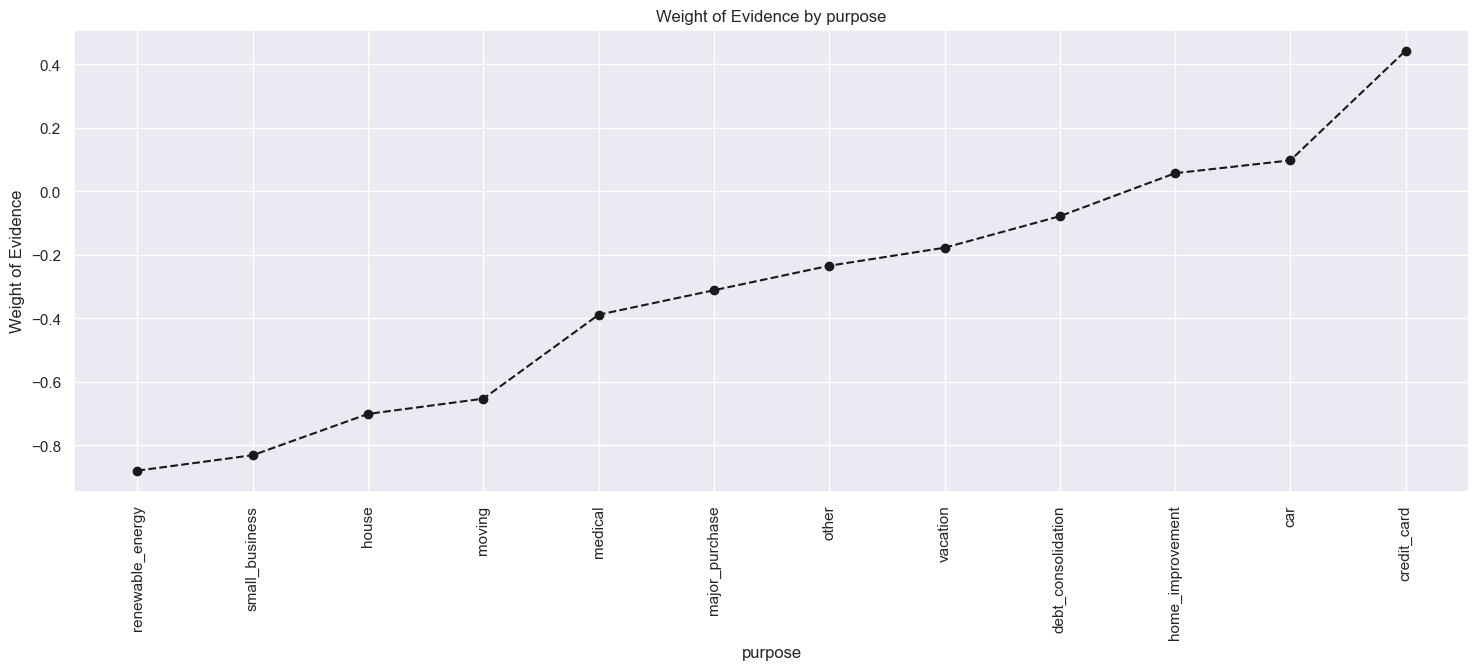

In [220]:
plot_by_woe(df_temp, rotation_of_x_axis_labels = 90)

In [221]:

df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [222]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV,IV_total
0,f,123360,0.968993,0.366189,119535.0,3825.0,0.362587,0.531102,-0.381692,NaN,NaN,0.064321,0.116061
1,w,213515,0.984184,0.633811,210138.0,3377.0,0.637413,0.468898,0.307034,0.015191,0.688726,0.051740,0.116061


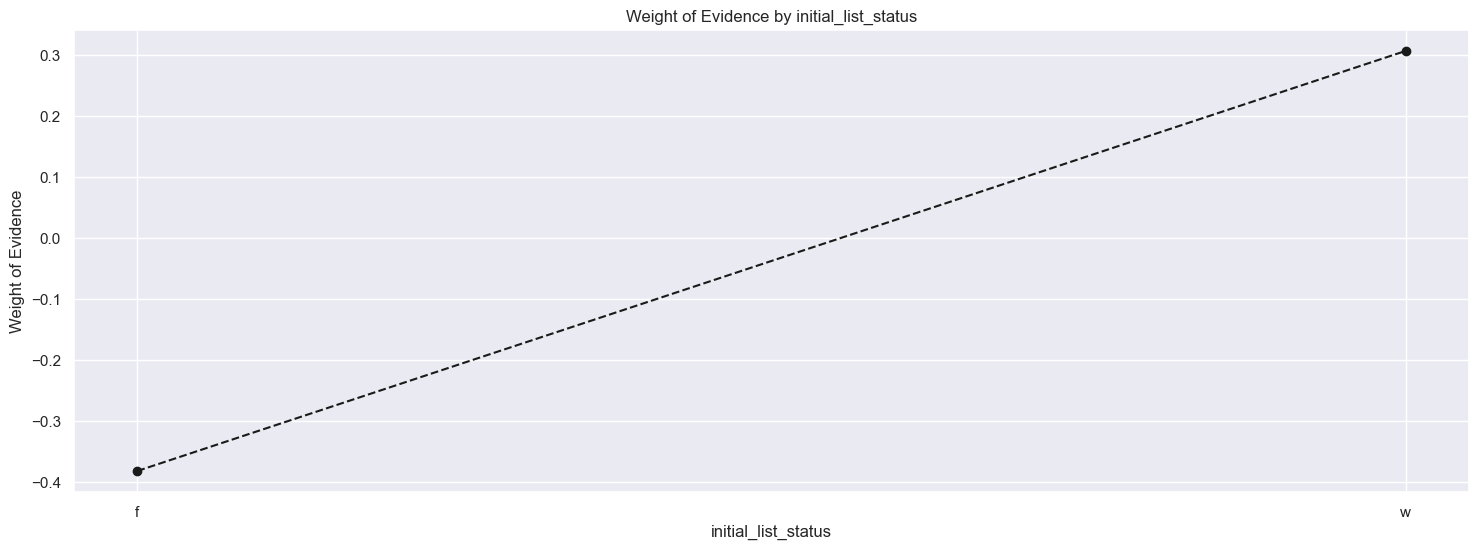

In [223]:
plot_by_woe(df_temp)

In [224]:
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [225]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [226]:
df_inputs_prepr['emp_length_int'].unique()

array([10.,  3.,  9.,  6.,  7.,  8.,  0.,  1.,  2.,  5.,  4.])

In [227]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,46568,0.974231,0.138235,45368.0,1200.0,0.137615,0.166620,-0.191257,NaN,NaN,0.019927
1,1.0,21898,0.974016,0.065003,21329.0,569.0,0.064697,0.079006,-0.199800,0.000215,0.008543,0.019927
2,2.0,30067,0.977583,0.089253,29393.0,674.0,0.089158,0.093585,-0.048461,0.003568,0.151339,0.019927
3,3.0,26718,0.978030,0.079311,26131.0,587.0,0.079263,0.081505,-0.027890,0.000446,0.020571,0.019927
4,4.0,19522,0.977410,0.057950,19081.0,441.0,0.057879,0.061233,-0.056339,0.000620,0.028449,0.019927
5,5.0,19972,0.978069,0.059286,19534.0,438.0,0.059253,0.060816,-0.026050,0.000659,0.030289,0.019927
6,6.0,13480,0.977003,0.040015,13170.0,310.0,0.039949,0.043044,-0.074618,0.001066,0.048568,0.019927
7,7.0,14820,0.976586,0.043993,14473.0,347.0,0.043901,0.048181,-0.093027,0.000417,0.018409,0.019927
8,8.0,17213,0.980770,0.051096,16882.0,331.0,0.051208,0.045959,0.108142,0.004185,0.201170,0.019927
9,9.0,13348,0.979847,0.039623,13079.0,269.0,0.039673,0.037351,0.060309,0.000923,0.047833,0.019927


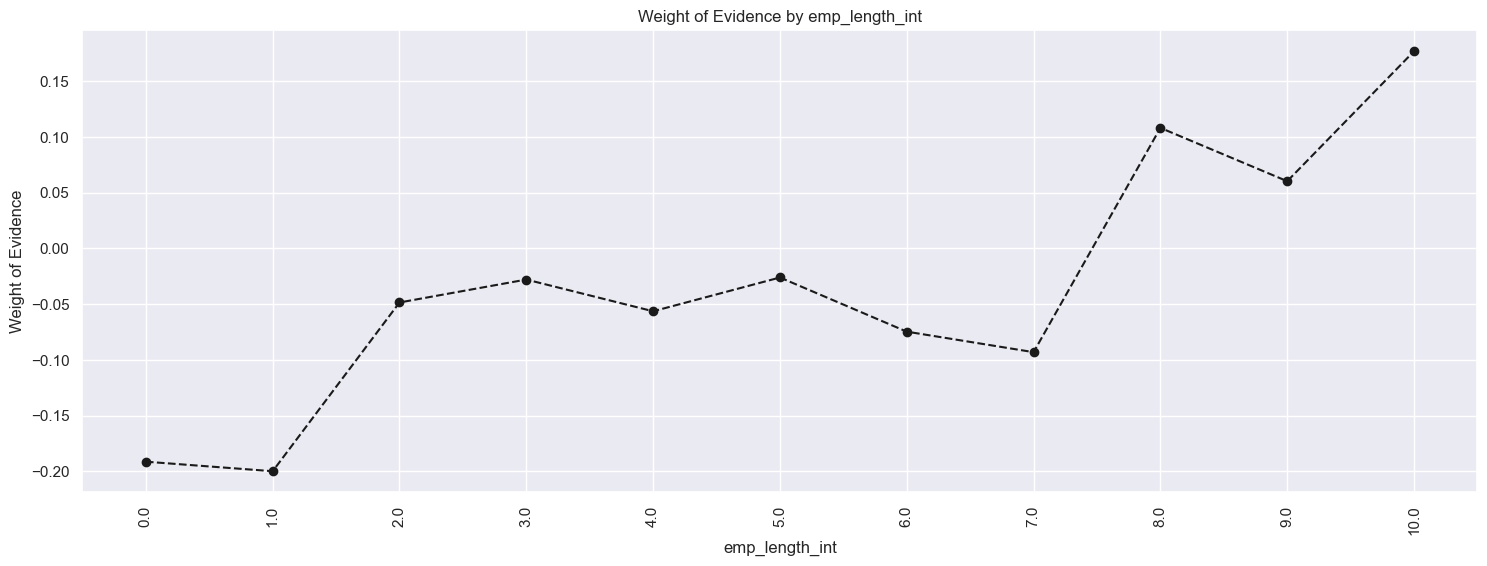

In [228]:
plot_by_woe(df_temp, rotation_of_x_axis_labels = 90)

In [229]:

df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

In [230]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)

In [231]:
df_inputs_prepr['mths_since_issue_d_factor']

308635    (31.92, 32.16]
92420     (25.92, 26.16]
336354    (33.84, 34.08]
137359    (26.88, 27.12]
231186     (28.8, 29.04]
               ...      
259178     (29.76, 30.0]
365838    (33.84, 34.08]
131932    (26.88, 27.12]
146867    (26.88, 27.12]
121958    (25.92, 26.16]
Name: mths_since_issue_d_factor, Length: 336875, dtype: category
Categories (50, interval[float64, right]): [(23.988, 24.24] < (24.24, 24.48] < (24.48, 24.72] < (24.72, 24.96] ... (35.04, 35.28] < (35.28, 35.52] < (35.52, 35.76] < (35.76, 36.0]]

In [232]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/tmp/ipykernel_17064/3203326403.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_17064/3203326403.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(23.988, 24.24]",35571,0.999382,0.105591,35549.0,22.0,0.107831,0.003055,3.563882,NaN,NaN,1.002133
1,"(24.24, 24.48]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.002133
2,"(24.48, 24.72]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.002133
3,"(24.72, 24.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.002133
4,"(24.96, 25.2]",29918,0.996490,0.088810,29813.0,105.0,0.090432,0.014579,1.824997,NaN,NaN,1.002133
5,"(25.2, 25.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.002133
6,"(25.44, 25.68]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.002133
7,"(25.68, 25.92]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.002133
8,"(25.92, 26.16]",38904,0.995733,0.115485,38738.0,166.0,0.117504,0.023049,1.628846,NaN,NaN,1.002133
9,"(26.16, 26.4]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.002133


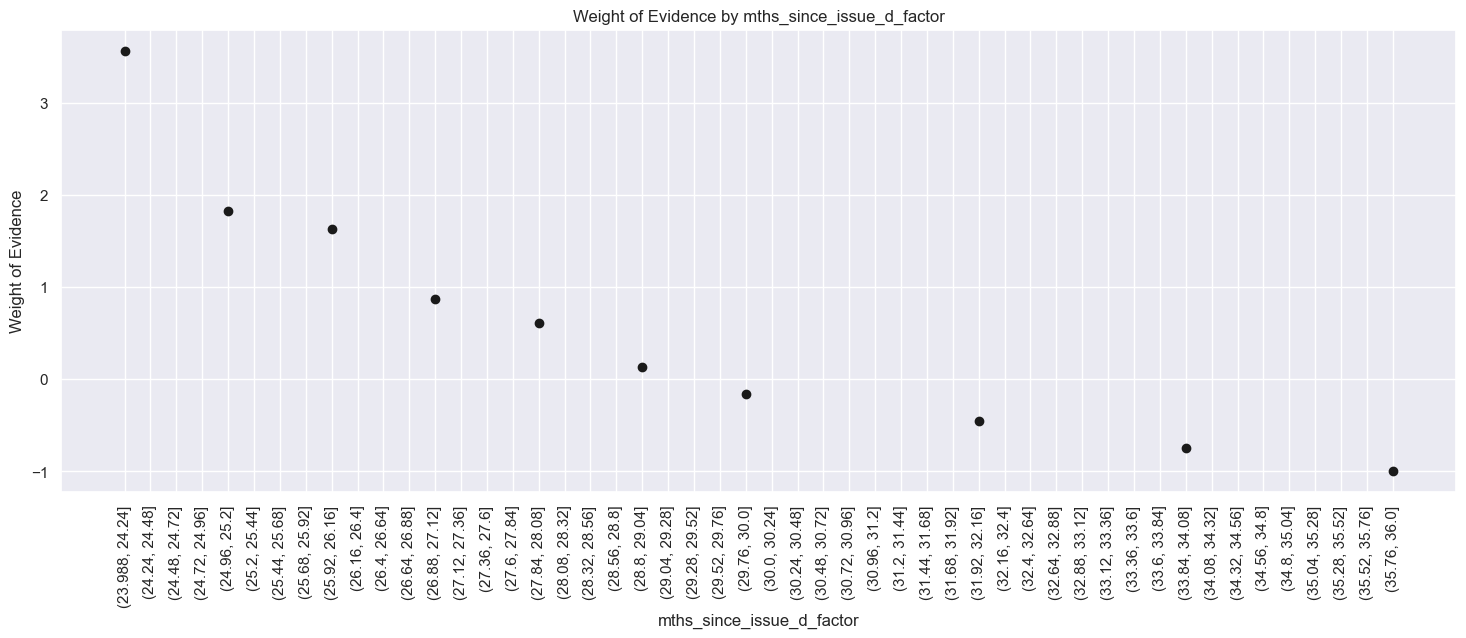

In [233]:
plot_by_woe(df_temp,rotation_of_x_axis_labels=90)


In [234]:

df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [235]:

df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [236]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/tmp/ipykernel_17064/3203326403.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_17064/3203326403.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.296, 5.793]",7733,0.998836,0.022955,7724.0,9.0,0.023429,0.001250,2.931121,NaN,NaN,inf
1,"(5.793, 6.267]",8164,0.996325,0.024235,8134.0,30.0,0.024673,0.004166,1.778868,0.002511,1.152252,inf
2,"(6.267, 6.74]",5247,0.993139,0.015576,5211.0,36.0,0.015807,0.004999,1.151266,0.003186,0.627603,inf
3,"(6.74, 7.214]",9995,0.994097,0.029670,9936.0,59.0,0.030139,0.008192,1.302640,0.000958,0.151374,inf
4,"(7.214, 7.687]",9140,0.997046,0.027132,9113.0,27.0,0.027643,0.003749,1.997878,0.002949,0.695238,inf
5,"(7.687, 8.16]",16524,0.995098,0.049051,16443.0,81.0,0.049877,0.011247,1.489463,0.001948,0.508414,inf
6,"(8.16, 8.634]",18032,0.992902,0.053527,17904.0,128.0,0.054308,0.017773,1.117007,0.002197,0.372457,inf
7,"(8.634, 9.107]",1632,0.976716,0.004845,1594.0,38.0,0.004835,0.005276,-0.087327,0.016186,1.204333,inf
8,"(9.107, 9.581]",17727,0.991651,0.052622,17579.0,148.0,0.053323,0.020550,0.953506,0.014935,1.040832,inf
9,"(9.581, 10.054]",17849,0.992997,0.052984,17724.0,125.0,0.053762,0.017356,1.130619,0.001346,0.177113,inf


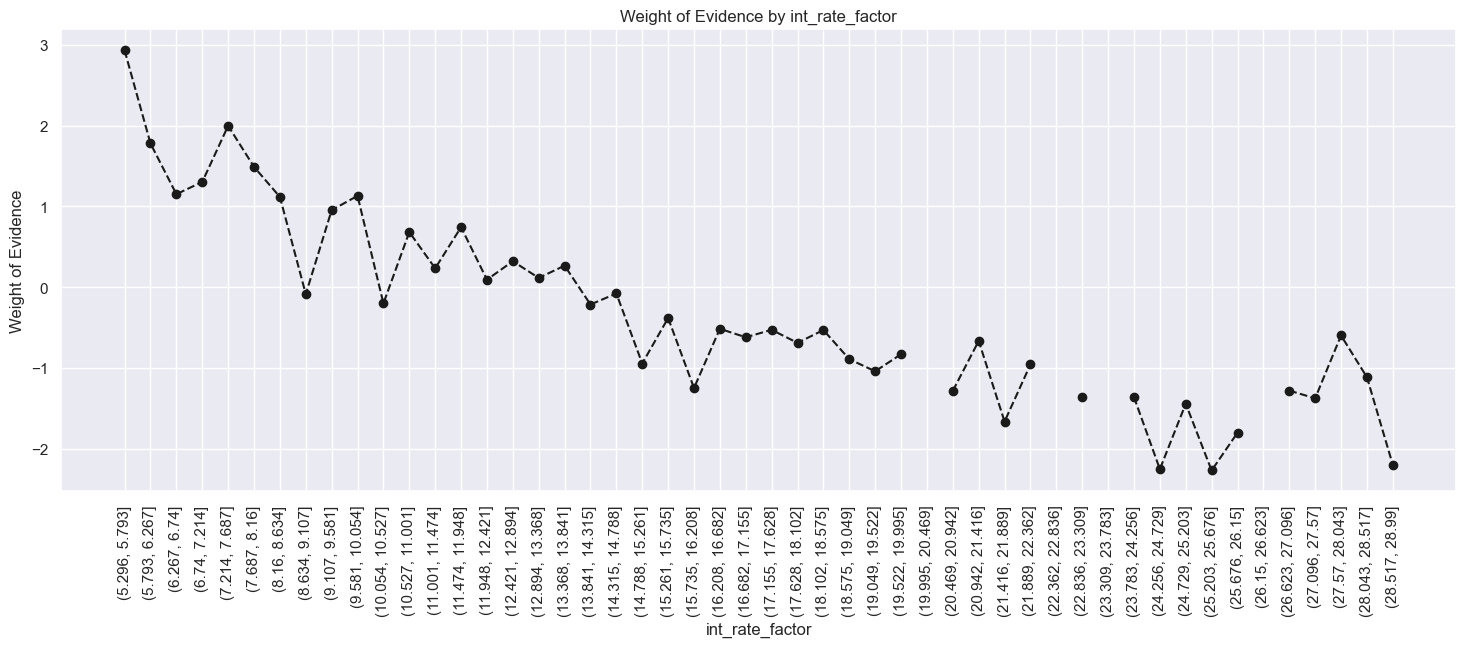

In [237]:
plot_by_woe(df_temp, 90)

In [238]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [239]:

df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)

df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)

df_temp

/tmp/ipykernel_17064/3203326403.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_17064/3203326403.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(966.0, 1680.0]",2728,0.979472,0.008098,2672.0,56.0,0.008105,0.007776,0.041488,NaN,NaN,0.026386
1,"(1680.0, 2360.0]",3015,0.979436,0.008950,2953.0,62.0,0.008957,0.008609,0.039700,0.000036,0.001788,0.026386
2,"(2360.0, 3040.0]",6472,0.979295,0.019212,6338.0,134.0,0.019225,0.018606,0.032736,0.000141,0.006964,0.026386
3,"(3040.0, 3720.0]",4089,0.982147,0.012138,4016.0,73.0,0.012182,0.010136,0.183840,0.002852,0.151103,0.026386
4,"(3720.0, 4400.0]",5869,0.975635,0.017422,5726.0,143.0,0.017369,0.019856,-0.133815,0.006513,0.317654,0.026386
5,"(4400.0, 5080.0]",14435,0.978524,0.042850,14125.0,310.0,0.042845,0.043044,-0.004613,0.002890,0.129201,0.026386
6,"(5080.0, 5760.0]",4521,0.981420,0.013420,4437.0,84.0,0.013459,0.011663,0.143174,0.002896,0.147788,0.026386
7,"(5760.0, 6440.0]",12830,0.980203,0.038085,12576.0,254.0,0.038147,0.035268,0.078469,0.001217,0.064706,0.026386
8,"(6440.0, 7120.0]",8431,0.980192,0.025027,8264.0,167.0,0.025067,0.023188,0.077928,0.000011,0.000541,0.026386
9,"(7120.0, 7800.0]",6737,0.977290,0.019999,6584.0,153.0,0.019971,0.021244,-0.061783,0.002903,0.139710,0.026386


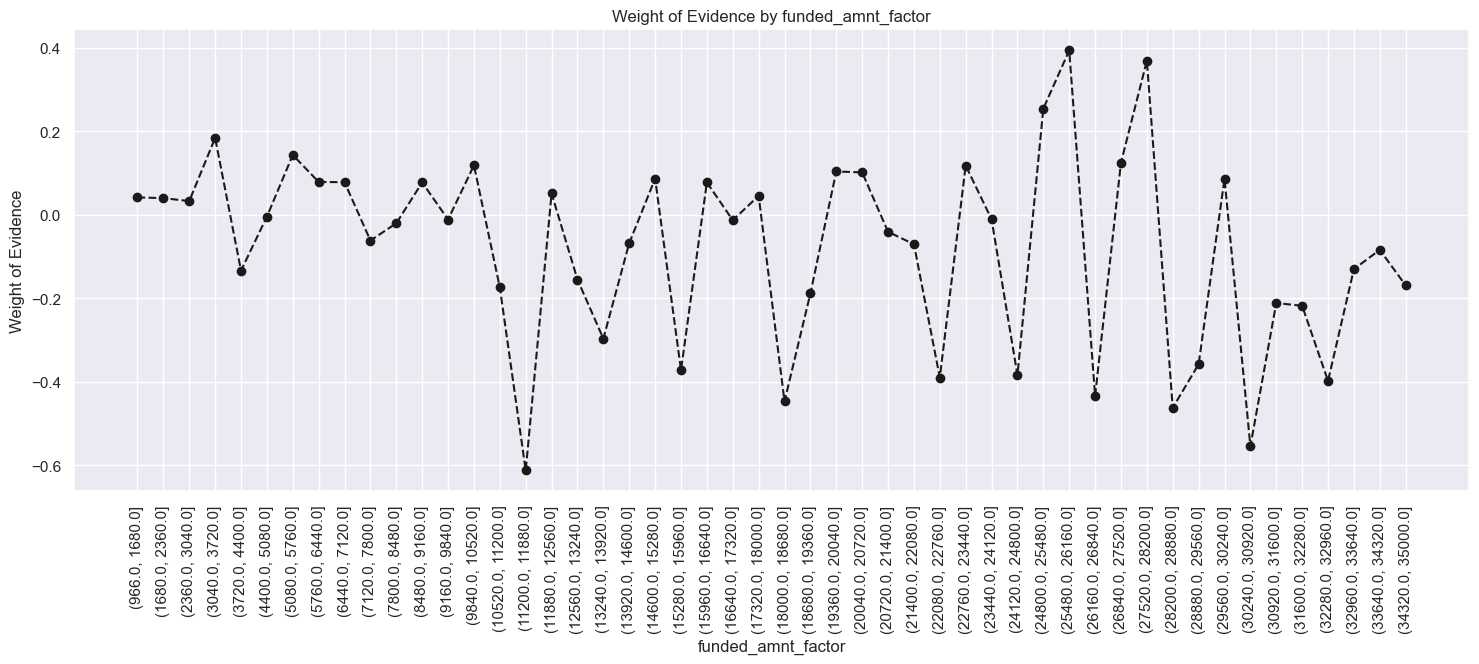

In [240]:
plot_by_woe(df_temp, 90)

In [241]:
# mths_since_earliest_cr_line
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/tmp/ipykernel_17064/3203326403.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_17064/3203326403.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(61.466, 72.68]",1595,0.981818,0.004735,1566.0,29.0,0.004750,0.004027,0.165242,NaN,NaN,0.039264
1,"(72.68, 83.36]",3931,0.970237,0.011669,3814.0,117.0,0.011569,0.016245,-0.339483,0.011582,0.504724,0.039264
2,"(83.36, 94.04]",3989,0.968664,0.011841,3864.0,125.0,0.011721,0.017356,-0.392598,0.001573,0.053115,0.039264
3,"(94.04, 104.72]",3691,0.970469,0.010957,3582.0,109.0,0.010865,0.015135,-0.331414,0.001805,0.061184,0.039264
4,"(104.72, 115.4]",5324,0.965815,0.015804,5142.0,182.0,0.015597,0.025271,-0.482552,0.004654,0.151138,0.039264
5,"(115.4, 126.08]",8144,0.973232,0.024175,7926.0,218.0,0.024042,0.030269,-0.230334,0.007417,0.252218,0.039264
6,"(126.08, 136.76]",8897,0.970889,0.026410,8638.0,259.0,0.026202,0.035962,-0.316644,0.002343,0.086310,0.039264
7,"(136.76, 147.44]",12495,0.973669,0.037091,12166.0,329.0,0.036903,0.045682,-0.213400,0.002780,0.103244,0.039264
8,"(147.44, 158.12]",16297,0.976069,0.048377,15907.0,390.0,0.048251,0.054152,-0.115375,0.002400,0.098025,0.039264
9,"(158.12, 168.8]",17959,0.973774,0.053311,17488.0,471.0,0.053047,0.065399,-0.209330,0.002296,0.093956,0.039264


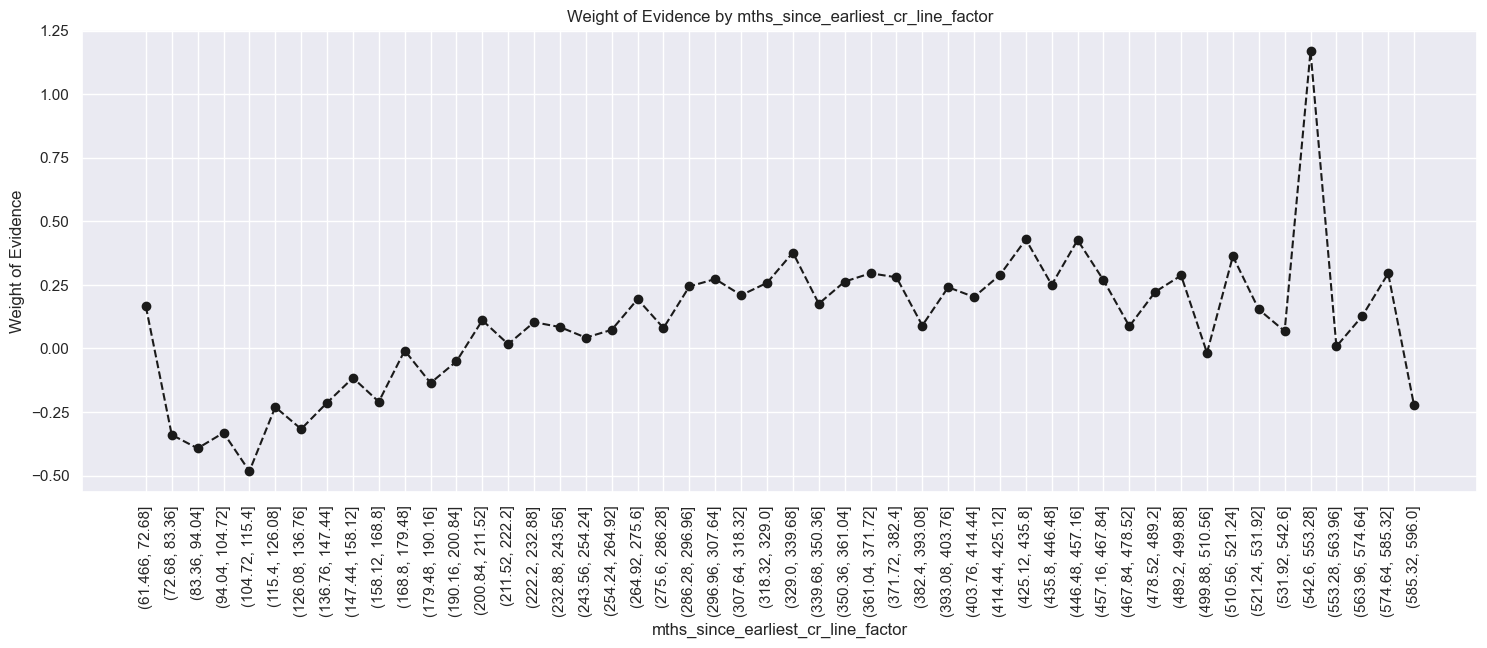

In [242]:
plot_by_woe(df_temp, 90)

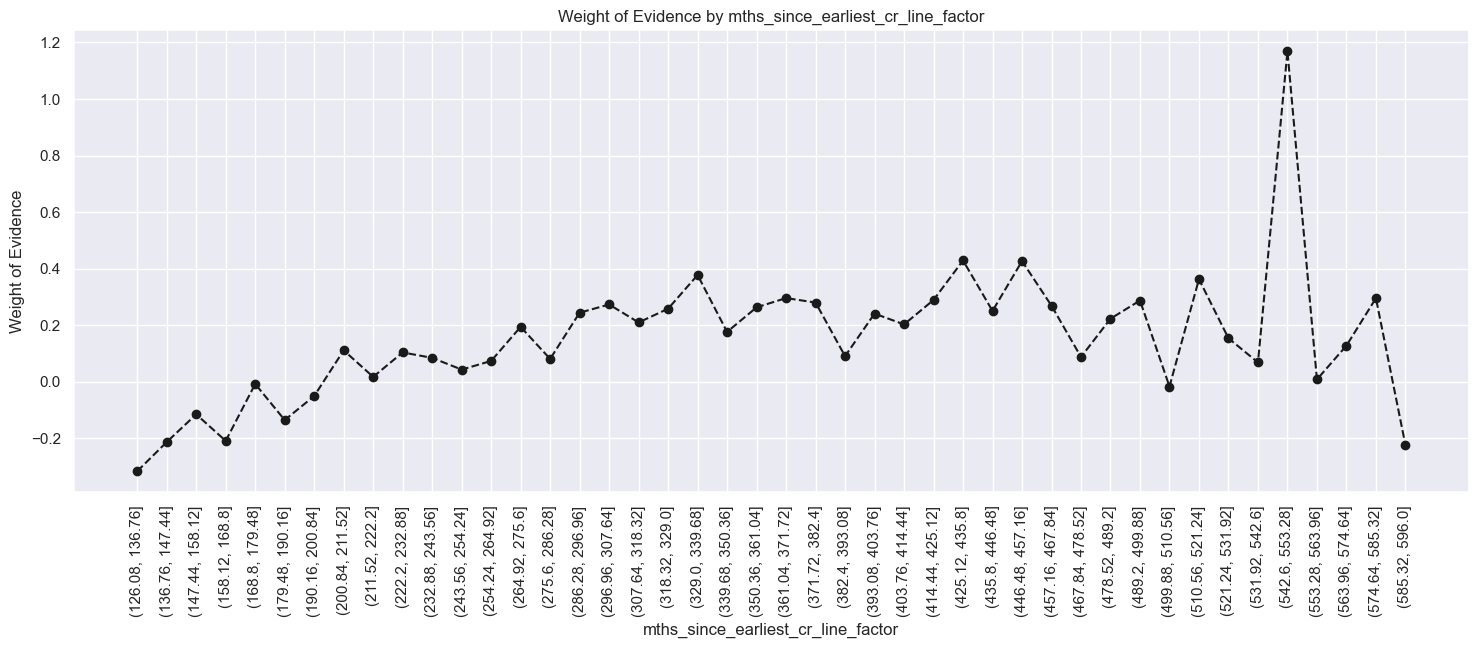

In [243]:
plot_by_woe(df_temp.iloc[6: , : ], 90)

In [244]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [245]:
# delinq_2yrs
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,267239,0.979314,0.793288,261711.0,5528.0,0.793850,0.767565,0.033672,NaN,NaN,inf
1,1.0,45608,0.977000,0.135386,44559.0,1049.0,0.135161,0.145654,-0.074766,0.002315,0.108438,inf
2,2.0,13740,0.975036,0.040787,13397.0,343.0,0.040637,0.047626,-0.158687,0.001963,0.083921,inf
3,3.0,5058,0.974100,0.015014,4927.0,131.0,0.014945,0.018189,-0.196454,0.000936,0.037767,inf
4,4.0,2356,0.968591,0.006994,2282.0,74.0,0.006922,0.010275,-0.395000,0.005510,0.198546,inf
5,5.0,1163,0.969905,0.003452,1128.0,35.0,0.003422,0.004860,-0.350889,0.001315,0.044111,inf
6,6.0,669,0.977578,0.001986,654.0,15.0,0.001984,0.002083,-0.048685,0.007673,0.302204,inf
7,7.0,360,0.972222,0.001069,350.0,10.0,0.001062,0.001389,-0.268394,0.005356,0.219709,inf
8,8.0,223,0.977578,0.000662,218.0,5.0,0.000661,0.000694,-0.048685,0.005356,0.219709,inf
9,9.0,150,0.980000,0.000445,147.0,3.0,0.000446,0.000417,0.068078,0.002422,0.116763,inf


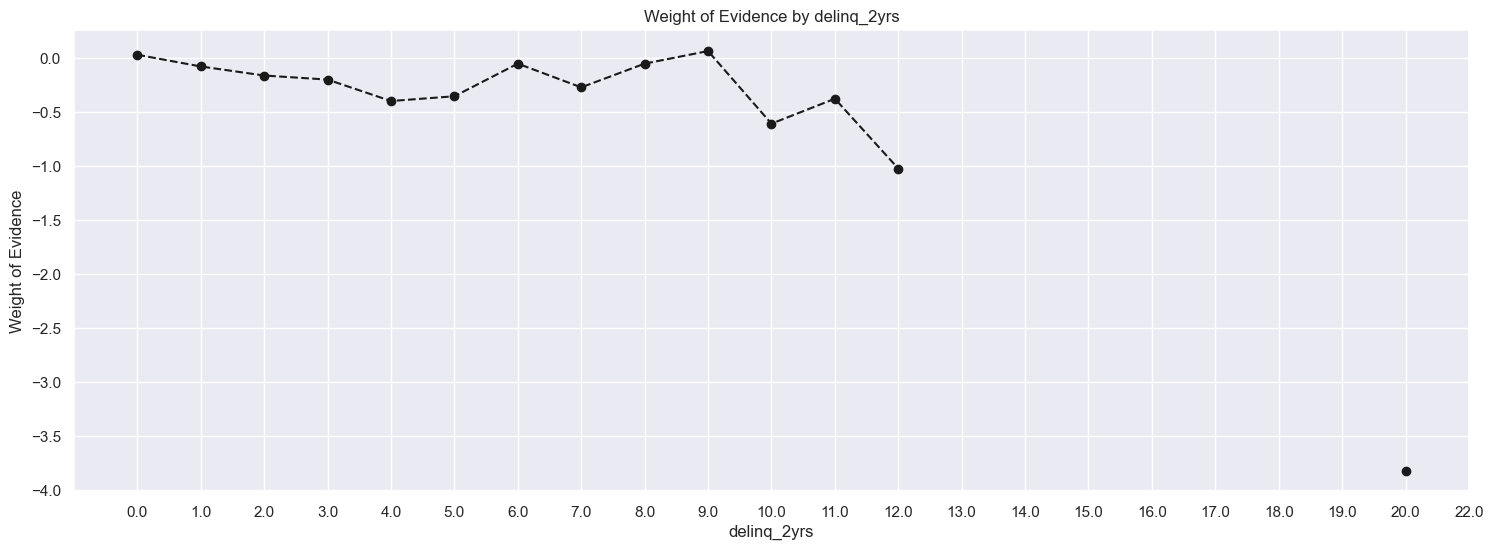

In [246]:
plot_by_woe(df_temp)


In [247]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [248]:
# inq_last_6mths
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,205222,0.982439,0.609193,201618.0,3604.0,0.611570,0.500417,0.200588,NaN,NaN,inf
1,1.0,88956,0.975561,0.264062,86782.0,2174.0,0.263237,0.301861,-0.136912,0.006878,0.337500,inf
2,2.0,29073,0.969491,0.086302,28186.0,887.0,0.085497,0.123160,-0.365007,0.006070,0.228095,inf
3,3.0,9804,0.960322,0.029103,9415.0,389.0,0.028559,0.054013,-0.637262,0.009168,0.272256,inf
4,4.0,2823,0.963514,0.008380,2720.0,103.0,0.008251,0.014302,-0.550084,0.003192,0.087178,inf
5,5.0,964,0.953320,0.002862,919.0,45.0,0.002788,0.006248,-0.807119,0.010194,0.257035,inf
6,6.0,33,1.000000,0.000098,33.0,0.0,0.000100,0.000000,inf,0.046680,inf,inf


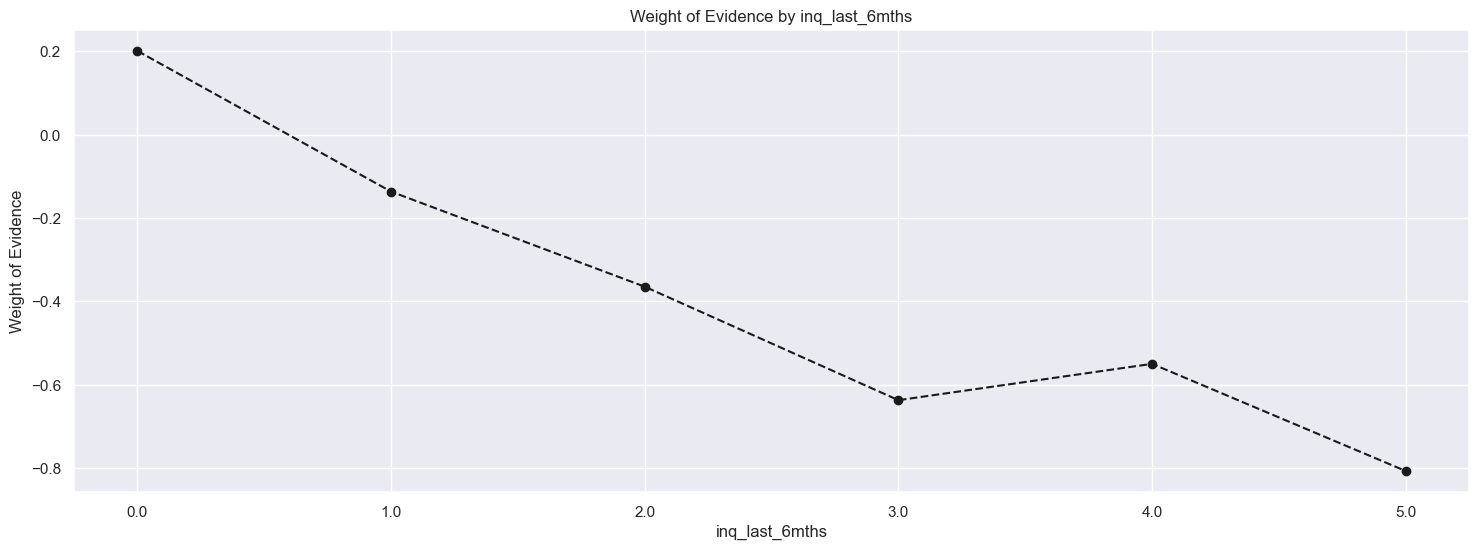

In [249]:
plot_by_woe(df_temp)

In [250]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [251]:

df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1.0,72,0.986111,0.000214,71.0,1.0,0.000215,0.000139,0.438937,NaN,NaN,inf
1,2.0,771,0.964981,0.002289,744.0,27.0,0.002257,0.003749,-0.507538,0.021131,0.946476,inf
2,3.0,3259,0.983124,0.009674,3204.0,55.0,0.009719,0.007637,0.241080,0.018143,0.748618,inf
3,4.0,8569,0.977010,0.025437,8372.0,197.0,0.025395,0.027354,-0.074298,0.006114,0.315378,inf
4,5.0,14598,0.978079,0.043334,14278.0,320.0,0.043310,0.044432,-0.025588,0.001069,0.048710,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
65,68.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
66,70.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
67,74.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
68,79.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf


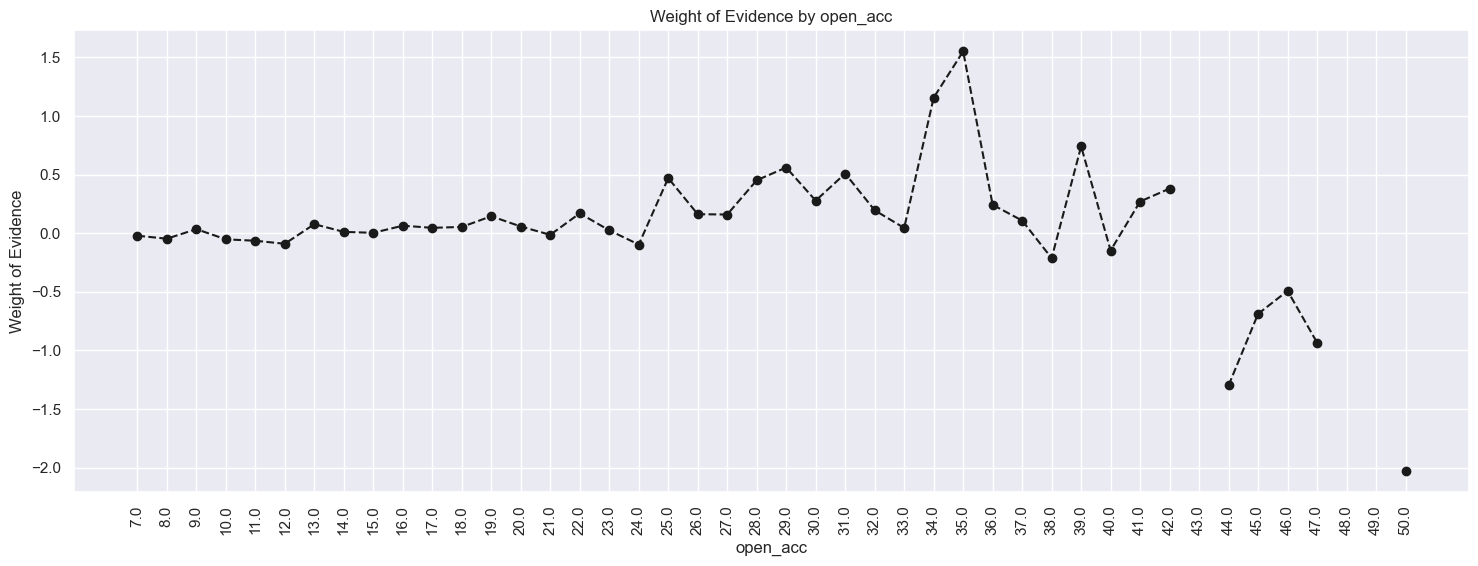

In [252]:
plot_by_woe(df_temp[6:-20], 90)

In [253]:

df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [254]:

df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)

df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,277487,0.978914,0.823709,271636.0,5851.0,0.823956,0.812413,0.014108,NaN,NaN,inf
1,1.0,48009,0.977046,0.142513,46907.0,1102.0,0.142283,0.153013,-0.072702,0.001868,0.086810,inf
2,2.0,7407,0.979479,0.021987,7255.0,152.0,0.022007,0.021105,0.041823,0.002433,0.114525,inf
3,3.0,2288,0.975087,0.006792,2231.0,57.0,0.006767,0.007914,-0.156589,0.004391,0.198412,inf
4,4.0,862,0.970998,0.002559,837.0,25.0,0.002539,0.003471,-0.312794,0.004090,0.156206,inf
5,5.0,379,0.976253,0.001125,370.0,9.0,0.001122,0.001250,-0.107464,0.005256,0.205330,inf
6,6.0,194,0.984536,0.000576,191.0,3.0,0.000579,0.000417,0.329919,0.008283,0.437383,inf
7,7.0,81,1.000000,0.000240,81.0,0.0,0.000246,0.000000,inf,0.015464,inf,inf
8,8.0,63,1.000000,0.000187,63.0,0.0,0.000191,0.000000,inf,0.000000,NaN,inf
9,9.0,32,0.968750,0.000095,31.0,1.0,0.000094,0.000139,-0.389755,0.031250,inf,inf


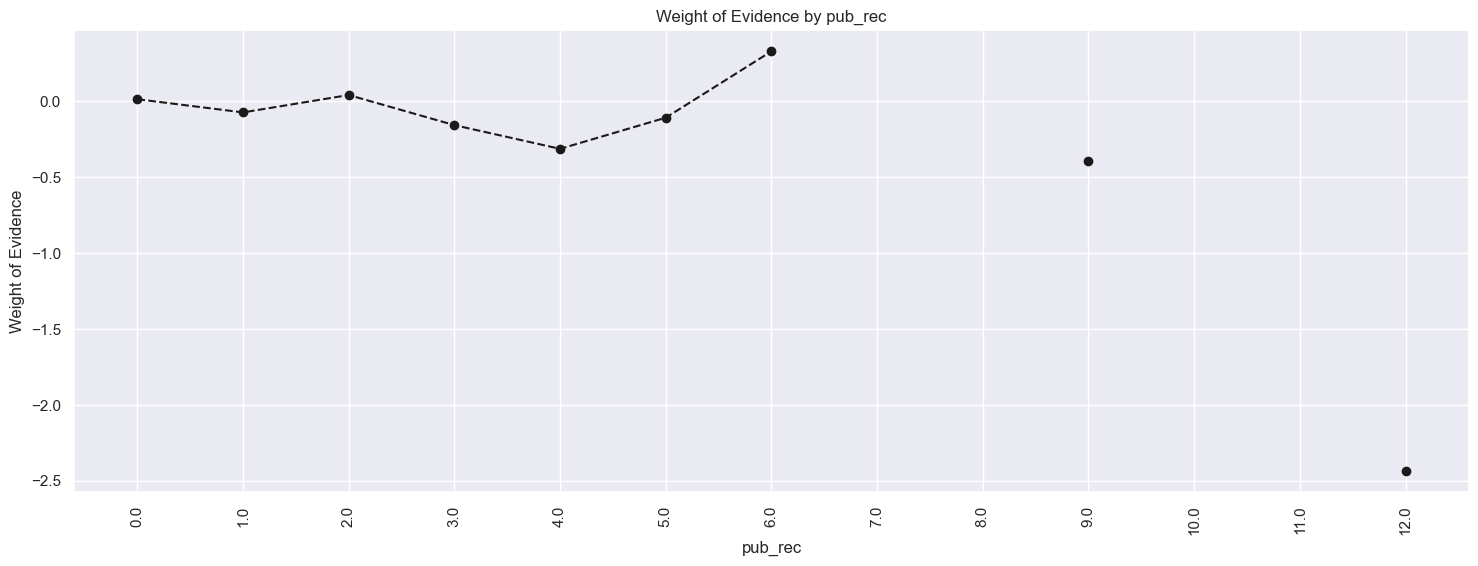

In [255]:
plot_by_woe(df_temp, 90)

In [256]:

df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [257]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

/tmp/ipykernel_17064/3203326403.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_17064/3203326403.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(3.835, 7.3]",9014,0.975039,0.026758,8789.0,225.0,0.026660,0.031241,-0.158587,NaN,NaN,inf
1,"(7.3, 10.6]",16826,0.976406,0.049947,16429.0,397.0,0.049834,0.055124,-0.100875,0.001367,0.057711,inf
2,"(10.6, 13.9]",25168,0.976955,0.074710,24588.0,580.0,0.074583,0.080533,-0.076757,0.000549,0.024119,inf
3,"(13.9, 17.2]",42669,0.977431,0.126661,41706.0,963.0,0.126507,0.133713,-0.055396,0.000476,0.021361,inf
4,"(17.2, 20.5]",35637,0.979684,0.105787,34913.0,724.0,0.105902,0.100528,0.052081,0.002253,0.107476,inf
5,"(20.5, 23.8]",35987,0.977492,0.106826,35177.0,810.0,0.106703,0.112469,-0.052629,0.002192,0.104710,inf
6,"(23.8, 27.1]",44400,0.978356,0.131800,43439.0,961.0,0.131764,0.133435,-0.012604,0.000864,0.040025,inf
7,"(27.1, 30.4]",28285,0.979954,0.083963,27718.0,567.0,0.084077,0.078728,0.065736,0.001598,0.078339,inf
8,"(30.4, 33.7]",23550,0.980764,0.069907,23097.0,453.0,0.070060,0.062899,0.107823,0.000810,0.042088,inf
9,"(33.7, 37.0]",24405,0.979840,0.072445,23913.0,492.0,0.072536,0.068314,0.059956,0.000924,0.047867,inf


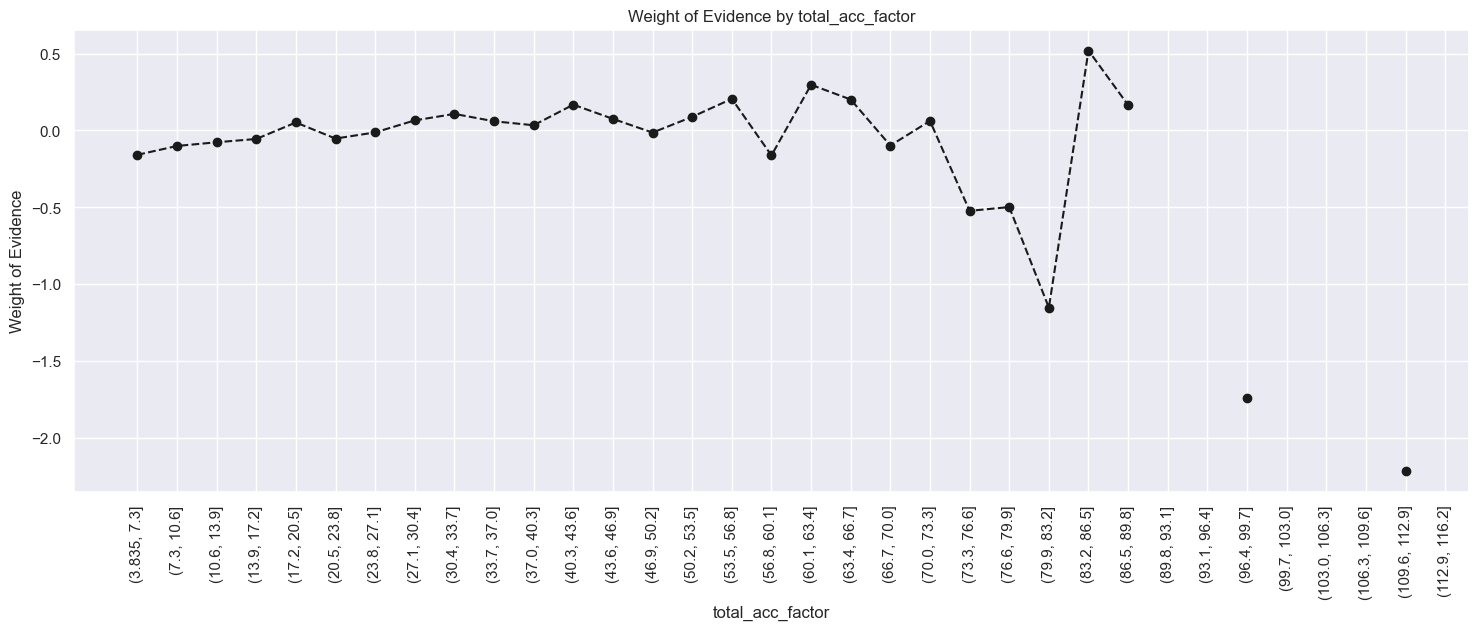

In [258]:
plot_by_woe(df_temp, 90)

In [259]:

df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [260]:

df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,334991,0.978743,0.994407,327870.0,7121.0,0.994531,0.988753,0.005827,NaN,NaN,inf
1,1.0,1777,0.958920,0.005275,1704.0,73.0,0.005169,0.010136,-0.673468,0.019823,0.679295,inf
2,2.0,86,0.918605,0.000255,79.0,7.0,0.000240,0.000972,-1.400205,0.040315,0.726737,inf
3,3.0,16,1.000000,0.000047,16.0,0.0,0.000049,0.000000,inf,0.081395,inf,inf
4,4.0,3,0.666667,0.000009,2.0,1.0,0.000006,0.000139,-3.130595,0.333333,inf,inf
5,5.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.333333,inf,inf
6,14.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf


In [261]:

df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [262]:

df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

/tmp/ipykernel_17064/3203326403.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_17064/3203326403.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 99999.99]",324531,0.978292,0.963357,317486.0,7045.0,0.963033,0.978200,-0.015627,NaN,NaN,inf
1,"(99999.99, 199999.98]",10420,0.987428,0.030931,10289.0,131.0,0.031210,0.018189,0.539891,0.009136,0.555518,inf
2,"(199999.98, 299999.97]",1314,0.988584,0.003901,1299.0,15.0,0.003940,0.002083,0.637557,0.001156,0.097666,inf
3,"(299999.97, 399999.96]",388,0.984536,0.001152,382.0,6.0,0.001159,0.000833,0.329919,0.004048,0.307639,inf
4,"(399999.96, 499999.95]",117,0.974359,0.000347,114.0,3.0,0.000346,0.000417,-0.186156,0.010177,0.516075,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(9499999.05, 9599999.04]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
96,"(9599999.04, 9699999.03]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
97,"(9699999.03, 9799999.02]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
98,"(9799999.02, 9899999.01]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


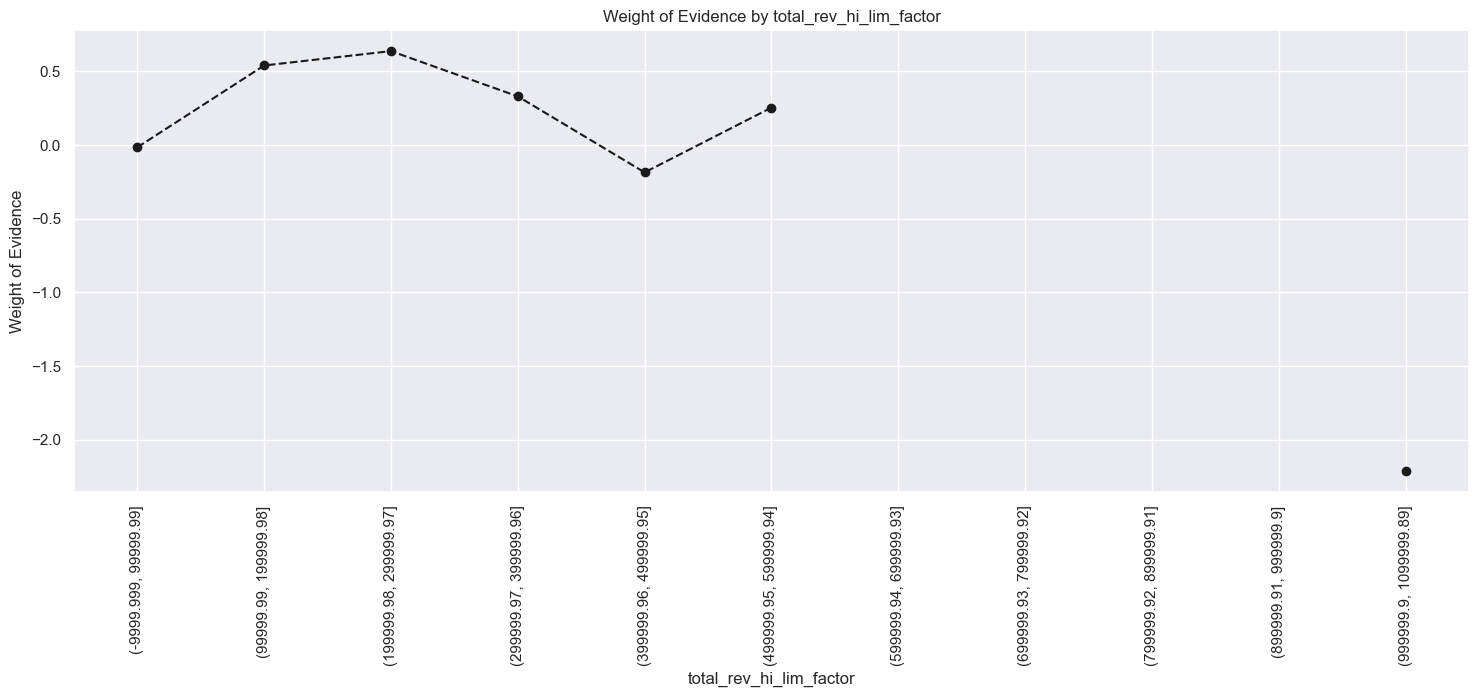

In [263]:
plot_by_woe(df_temp, 90)

In [264]:

df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [265]:

df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/tmp/ipykernel_17064/3203326403.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_17064/3203326403.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(28.705, 58.427]",2824,0.980170,0.008383,2768.0,56.0,0.008396,0.007776,0.076786,NaN,NaN,0.040379
1,"(58.427, 86.734]",4681,0.980346,0.013895,4589.0,92.0,0.013920,0.012774,0.085886,0.000176,0.009100,0.040379
2,"(86.734, 115.04]",6467,0.980826,0.019197,6343.0,124.0,0.019240,0.017217,0.111083,0.000480,0.025197,0.040379
3,"(115.04, 143.347]",7280,0.979533,0.021610,7131.0,149.0,0.021631,0.020689,0.044518,0.001293,0.066565,0.040379
4,"(143.347, 171.654]",14339,0.981240,0.042565,14070.0,269.0,0.042679,0.037351,0.133346,0.001707,0.088828,0.040379
5,"(171.654, 199.961]",12337,0.982573,0.036622,12122.0,215.0,0.036770,0.029853,0.208397,0.001333,0.075050,0.040379
6,"(199.961, 228.268]",13091,0.980063,0.038860,12830.0,261.0,0.038917,0.036240,0.071279,0.002510,0.137118,0.040379
7,"(228.268, 256.574]",17643,0.980899,0.052373,17306.0,337.0,0.052494,0.046793,0.114983,0.000836,0.043705,0.040379
8,"(256.574, 284.881]",20286,0.978310,0.060218,19846.0,440.0,0.060199,0.061094,-0.014759,0.002589,0.129743,0.040379
9,"(284.881, 313.188]",19298,0.978547,0.057285,18884.0,414.0,0.057281,0.057484,-0.003538,0.000237,0.011221,0.040379


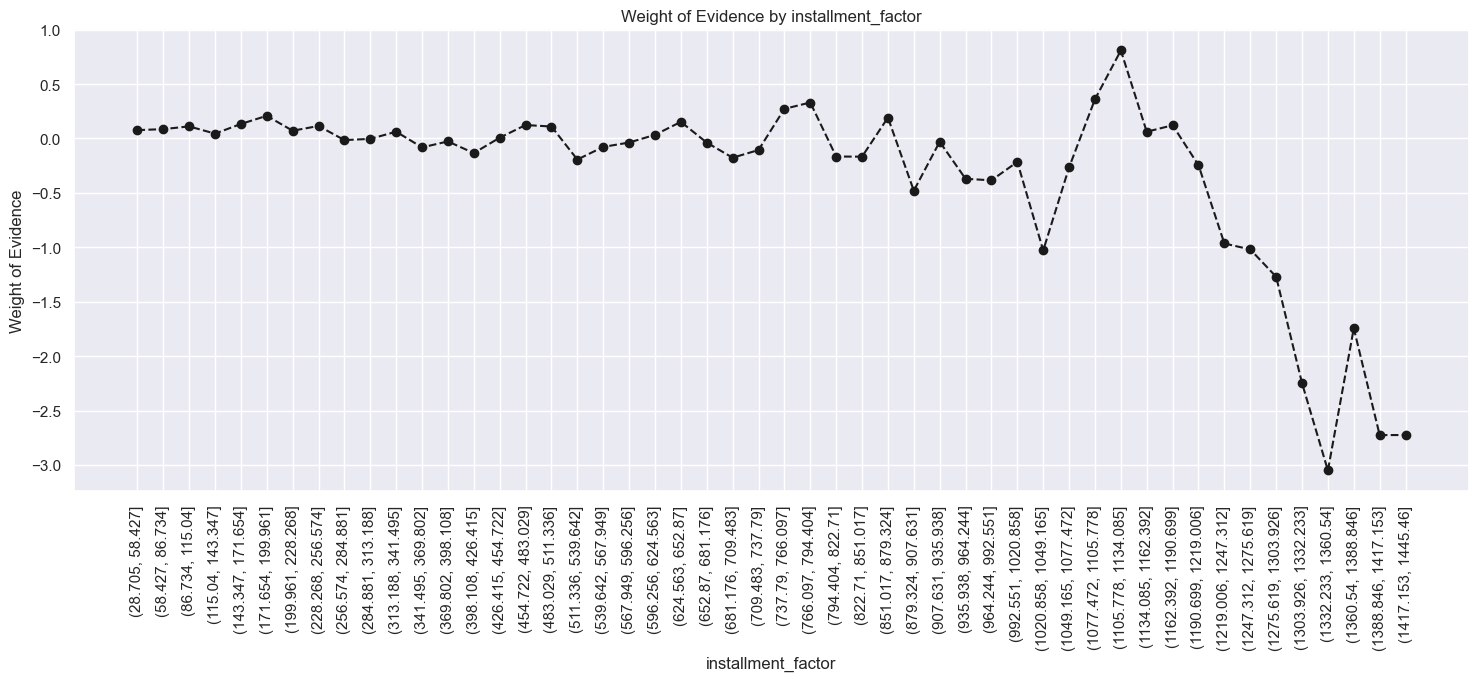

In [266]:
plot_by_woe(df_temp, 90)

In [267]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

/tmp/ipykernel_17064/3203326403.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_17064/3203326403.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9500.0, 190000.0]",327765,0.978457,0.972957,320704.0,7061.0,0.972794,0.980422,-0.007811,NaN,NaN,inf
1,"(190000.0, 380000.0]",8011,0.983523,0.023780,7879.0,132.0,0.023899,0.018328,0.265412,0.005066,0.273222,inf
2,"(380000.0, 570000.0]",753,0.992032,0.002235,747.0,6.0,0.002266,0.000833,1.000563,0.008509,0.735151,inf
3,"(570000.0, 760000.0]",207,0.995169,0.000614,206.0,1.0,0.000625,0.000139,1.504134,0.003137,0.503570,inf
4,"(760000.0, 950000.0]",50,1.000000,0.000148,50.0,0.0,0.000152,0.000000,inf,0.004831,inf,inf
5,"(950000.0, 1140000.0]",30,1.000000,0.000089,30.0,0.0,0.000091,0.000000,inf,0.000000,NaN,inf
6,"(1140000.0, 1330000.0]",14,0.928571,0.000042,13.0,1.0,0.000039,0.000139,-1.258793,0.071429,inf,inf
7,"(1330000.0, 1520000.0]",9,1.000000,0.000027,9.0,0.0,0.000027,0.000000,inf,0.071429,inf,inf
8,"(1520000.0, 1710000.0]",3,0.666667,0.000009,2.0,1.0,0.000006,0.000139,-3.130595,0.333333,inf,inf
9,"(1710000.0, 1900000.0]",4,1.000000,0.000012,4.0,0.0,0.000012,0.000000,inf,0.333333,inf,inf


In [268]:

df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]

In [269]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/tmp/ipykernel_17064/3701302728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
/tmp/ipykernel_17064/3203326403.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_17064/3203326403.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or o

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-140.0, 2800.0]",3,1.000000,0.000010,3.0,0.0,0.000010,0.000000,inf,NaN,NaN,inf
1,"(2800.0, 5600.0]",11,0.909091,0.000035,10.0,1.0,0.000033,0.000147,-1.504519,0.090909,inf,inf
2,"(5600.0, 8400.0]",47,1.000000,0.000150,47.0,0.0,0.000154,0.000000,inf,0.090909,inf,inf
3,"(8400.0, 11200.0]",344,0.965116,0.001100,332.0,12.0,0.001085,0.001766,-0.486876,0.034884,inf,inf
4,"(11200.0, 14000.0]",684,0.975146,0.002188,667.0,17.0,0.002181,0.002502,-0.137527,0.010030,0.349348,inf
5,"(14000.0, 16800.0]",1093,0.972553,0.003496,1063.0,30.0,0.003475,0.004416,-0.239451,0.002594,0.101924,inf
6,"(16800.0, 19600.0]",1429,0.962911,0.004570,1376.0,53.0,0.004499,0.007801,-0.550460,0.009641,0.311009,inf
7,"(19600.0, 22400.0]",3019,0.969526,0.009656,2927.0,92.0,0.009570,0.013541,-0.347159,0.006615,0.203301,inf
8,"(22400.0, 25200.0]",5178,0.972576,0.016561,5036.0,142.0,0.016465,0.020901,-0.238564,0.003050,0.108596,inf
9,"(25200.0, 28000.0]",4734,0.973173,0.015141,4607.0,127.0,0.015062,0.018693,-0.215959,0.000597,0.022605,inf


In [270]:

df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [271]:

df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

/tmp/ipykernel_17064/2565167433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
/tmp/ipykernel_17064/3203326403.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_17064/3203326403.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to reta

,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.176, 3.52]",5772,0.965177,0.033238,5571.0,201.0,0.032791,0.053472,-0.489009,NaN,NaN,inf
1,"(3.52, 7.04]",12644,0.975324,0.072811,12332.0,312.0,0.072586,0.083001,-0.134084,0.010148,0.354925,inf
2,"(7.04, 10.56]",9891,0.977353,0.056958,9667.0,224.0,0.056900,0.059590,-0.046206,0.002029,0.087878,inf
3,"(10.56, 14.08]",12935,0.976807,0.074487,12635.0,300.0,0.074369,0.079808,-0.070590,0.000546,0.024384,inf
4,"(14.08, 17.6]",9071,0.973101,0.052236,8827.0,244.0,0.051955,0.064911,-0.222631,0.003706,0.152041,inf
5,"(17.6, 21.12]",11387,0.979538,0.065573,11154.0,233.0,0.065652,0.061985,0.057481,0.006437,0.280113,inf
6,"(21.12, 24.64]",8482,0.979250,0.048844,8306.0,176.0,0.048889,0.046821,0.043216,0.000288,0.014266,inf
7,"(24.64, 28.16]",10940,0.978793,0.062998,10708.0,232.0,0.063027,0.061719,0.020976,0.000457,0.022240,inf
8,"(28.16, 31.68]",7902,0.982663,0.045504,7765.0,137.0,0.045704,0.036446,0.226367,0.003869,0.205392,inf
9,"(31.68, 35.2]",10019,0.981835,0.057695,9837.0,182.0,0.057900,0.048417,0.178866,0.000828,0.047501,inf


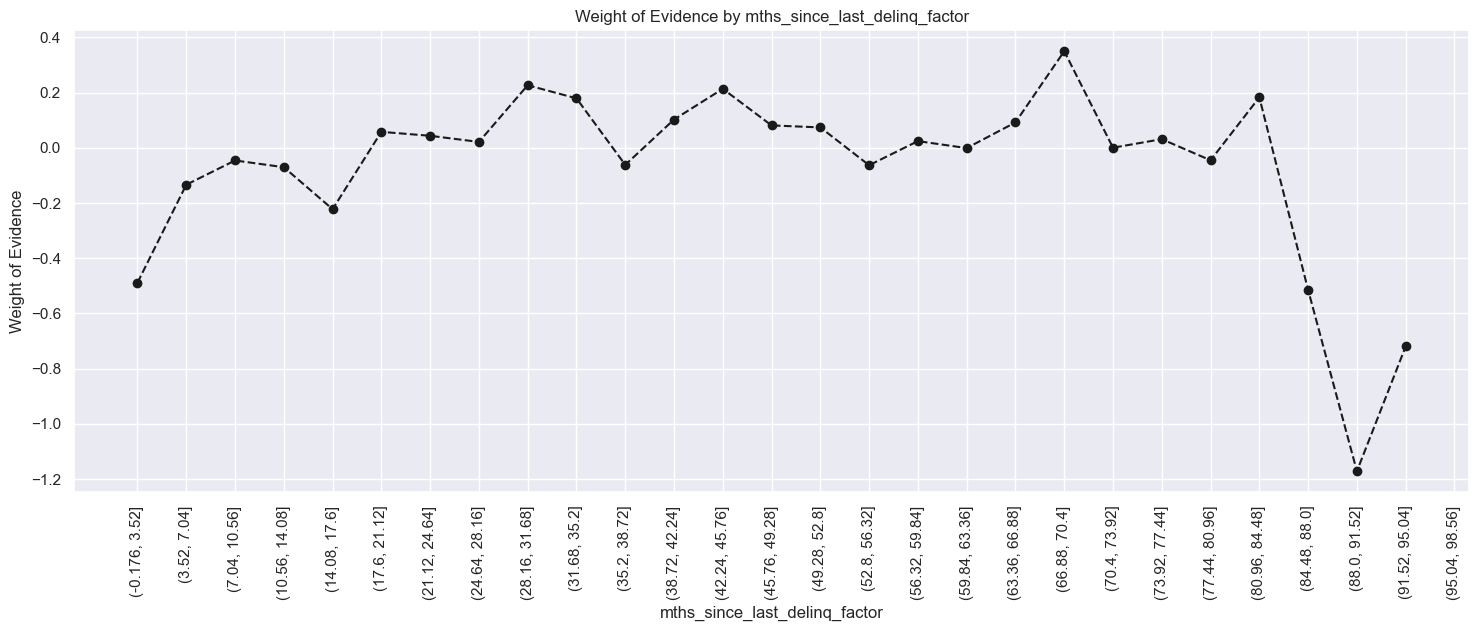

In [272]:
plot_by_woe(df_temp, 90)

In [273]:

df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)


In [274]:

df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

/tmp/ipykernel_17064/3203326403.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipykernel_17064/3203326403.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9.999, 199.98]",336871,0.978621,0.999988,329669.0,7202.0,0.999988,1.0,-0.000012,NaN,NaN,inf
1,"(199.98, 399.96]",1,1.000000,0.000003,1.0,0.0,0.000003,0.0,inf,0.021379,inf,inf
2,"(399.96, 599.94]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(599.94, 799.92]",1,1.000000,0.000003,1.0,0.0,0.000003,0.0,inf,NaN,NaN,inf
4,"(799.92, 999.9]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
5,"(999.9, 1199.88]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(1199.88, 1399.86]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
7,"(1399.86, 1599.84]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,"(1599.84, 1799.82]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(1799.82, 1999.8]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


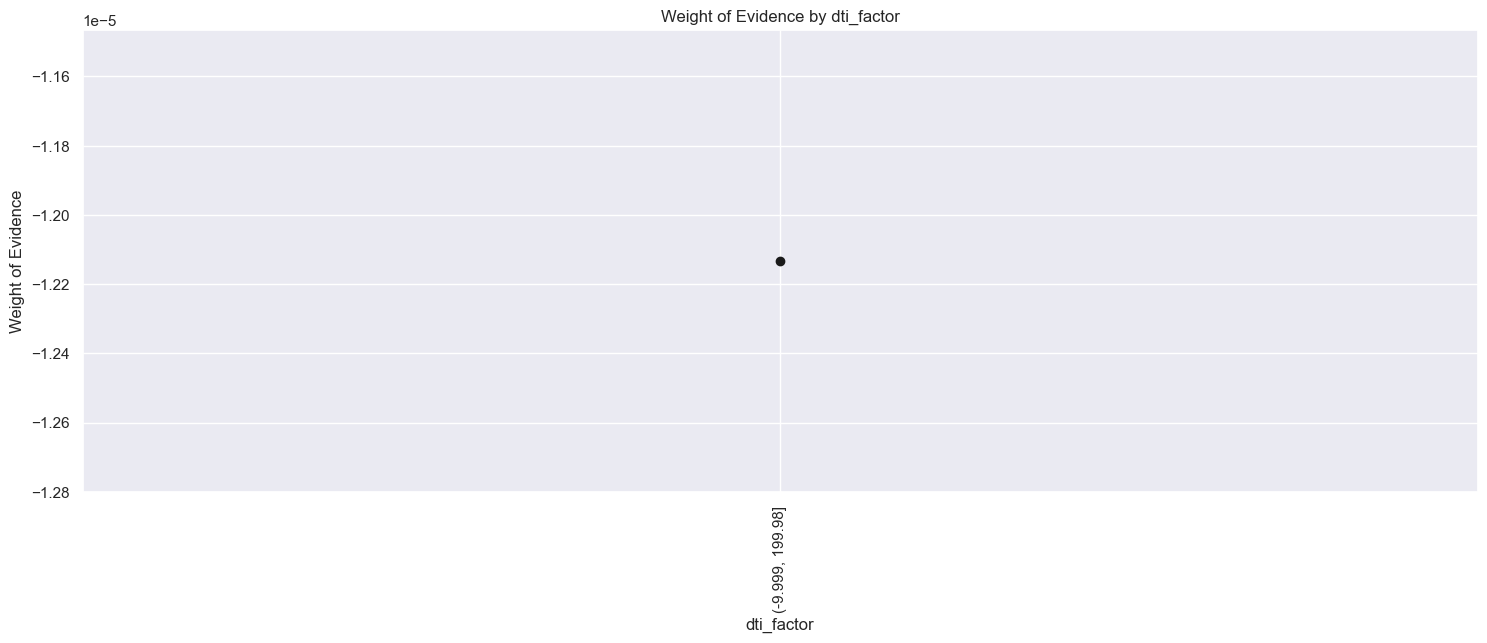

In [275]:
plot_by_woe(df_temp, 90)

In [276]:

df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

/tmp/ipykernel_17064/2812961487.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
/tmp/ipykernel_17064/2812961487.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
/tmp/ipykernel_17064/2812961487.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fr

In [277]:

df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/tmp/ipykernel_17064/2814976102.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
/tmp/ipykernel_17064/2814976102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
/tmp/ipykernel_17064/3203326403.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True 

,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.12, 2.4]",70,0.971429,0.001179,68.0,2.0,0.001172,0.001480,-0.233875,NaN,NaN,0.063048
1,"(2.4, 4.8]",128,0.960938,0.002155,123.0,5.0,0.002119,0.003701,-0.557489,0.010491,0.323614,0.063048
2,"(4.8, 7.2]",275,0.981818,0.004631,270.0,5.0,0.004652,0.003701,0.228748,0.020881,0.786238,0.063048
3,"(7.2, 9.6]",233,0.982833,0.003923,229.0,4.0,0.003946,0.002961,0.287192,0.001014,0.058444,0.063048
4,"(9.6, 12.0]",450,0.966667,0.007577,435.0,15.0,0.007495,0.011103,-0.392940,0.016166,0.680132,0.063048
5,"(12.0, 14.4]",318,0.981132,0.005355,312.0,6.0,0.005376,0.004441,0.191008,0.014465,0.583948,0.063048
6,"(14.4, 16.8]",314,0.964968,0.005287,303.0,11.0,0.005221,0.008142,-0.444398,0.016164,0.635406,0.063048
7,"(16.8, 19.2]",551,0.983666,0.009278,542.0,9.0,0.009339,0.006662,0.337806,0.018698,0.782204,0.063048
8,"(19.2, 21.6]",419,0.978520,0.007055,410.0,9.0,0.007064,0.006662,0.058697,0.005146,0.279109,0.063048
9,"(21.6, 24.0]",671,0.973174,0.011299,653.0,18.0,0.011251,0.013323,-0.169030,0.005346,0.227727,0.063048


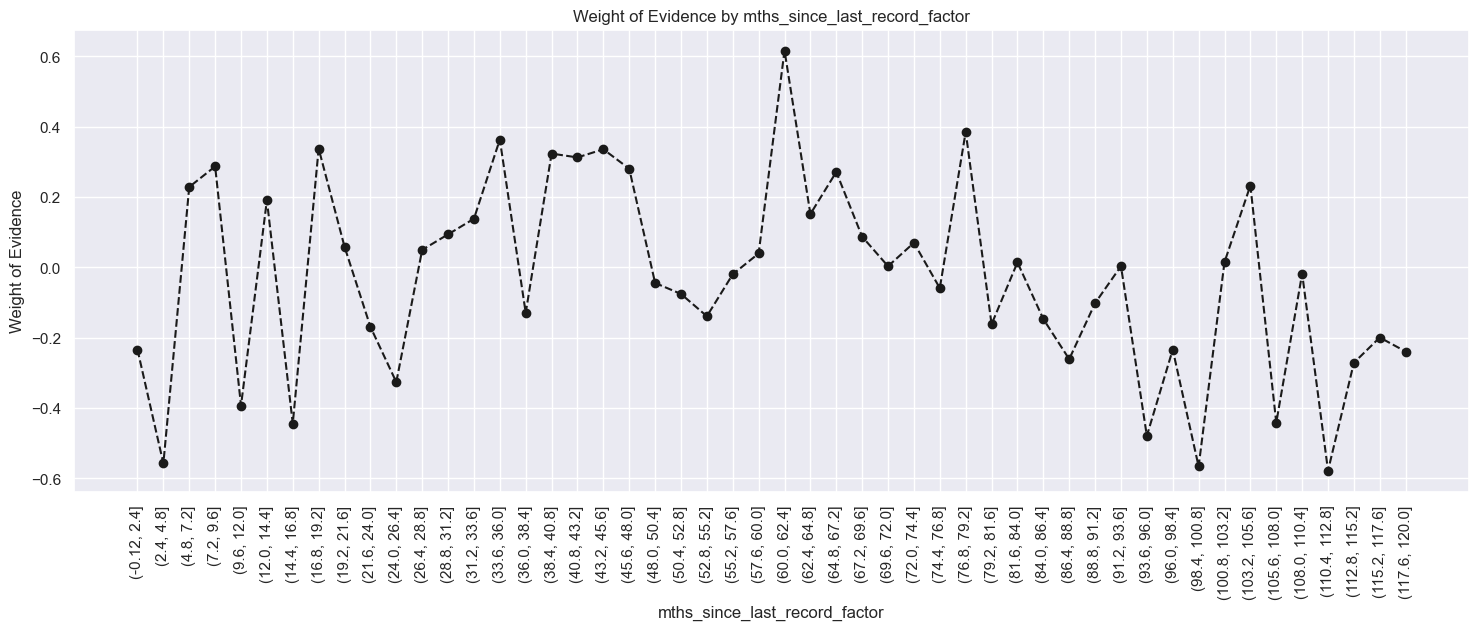

In [278]:
plot_by_woe(df_temp, 90)

In [279]:

df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

/tmp/ipykernel_17064/2184311401.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
/tmp/ipykernel_17064/2184311401.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
/tmp/ipykernel_17064/2184311401.py:3: PerformanceWarning: DataFrame is highly fra

In [280]:

loan_data_inputs_train = df_inputs_prepr    
loan_data_targets_train = df_targets_prepr
loan_data_inputs_train.to_csv('loan_data_inputs_train_2015.csv')
loan_data_targets_train.to_csv('loan_data_targets_train_2015.csv')

In [281]:
# loan_data_inputs_test = df_inputs_prepr
# loan_data_targets_test = df_targets_prepr

# loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
# loan_data_targets_test.to_csv('loan_data_targets_test.csv')